In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

from scipy import stats
from scipy.stats import (
    skewnorm,
    gamma,
    expon,
    uniform,
    bernoulli,
    binom,
    poisson,
    shapiro,
)

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from tensorflow.keras import initializers

from statsmodels.graphics.gofplots import qqplot

2025-03-31 12:08:34.139682: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743422914.219755     759 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743422914.245480     759 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 12:08:34.432213: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
normal_data = stats.norm.rvs(size=1000, loc=0, scale=1)

normal_data = np.array(normal_data)

min(normal_data), max(normal_data)

(-2.6720628741106873, 3.7429015258889717)

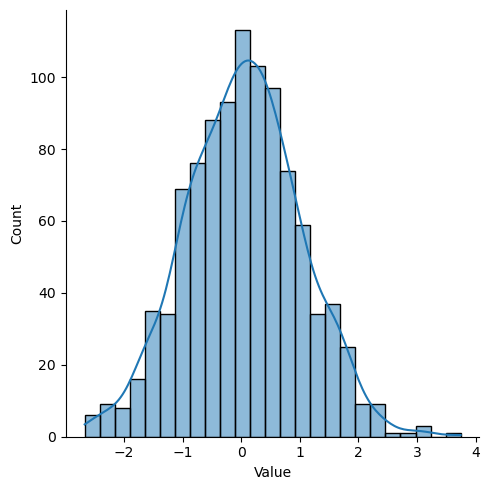

In [4]:
dataframe = pd.DataFrame(normal_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [5]:
np.mean(normal_data), np.median(normal_data), stats.mode(normal_data), np.var(
    normal_data
), np.std(normal_data)

(0.04193360469862822,
 0.04643211476546805,
 ModeResult(mode=-2.6720628741106873, count=1),
 0.9545790095711193,
 0.9770255930993411)

In [6]:
# Between mean and mean + std
a = normal_data >= np.mean(normal_data)

b = normal_data <= np.mean(normal_data) + np.std(normal_data)

np.sum(a & b)

353

In [7]:
# Between mean and mean - std
a = normal_data >= np.mean(normal_data) - np.std(normal_data)

b = normal_data <= np.mean(normal_data)

np.sum(a & b)

337

In [8]:
# Between mean - std and mean + std
a = normal_data >= np.mean(normal_data) - np.std(normal_data)

b = normal_data <= np.mean(normal_data) + np.std(normal_data)

np.sum(a & b)

690

In [9]:
699 / 1000

0.699

In [10]:
height_data = np.array(
    [
        126.0,
        129.5,
        133.0,
        133.0,
        136.5,
        136.5,
        140.0,
        140.0,
        140.0,
        140.0,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        178.5,
        178.5,
        178.5,
        178.5,
        182.0,
        182.0,
        185.5,
        185.5,
        189.0,
        192.5,
    ]
)

In [11]:
len(height_data), min(height_data), max(height_data), np.mean(height_data), np.median(
    height_data
), stats.mode(height_data), np.var(height_data), np.std(height_data), stats.variation(
    height_data
) * 100

(100,
 126.0,
 192.5,
 159.25,
 159.25,
 ModeResult(mode=157.5, count=10),
 186.3225,
 13.65,
 8.571428571428571)

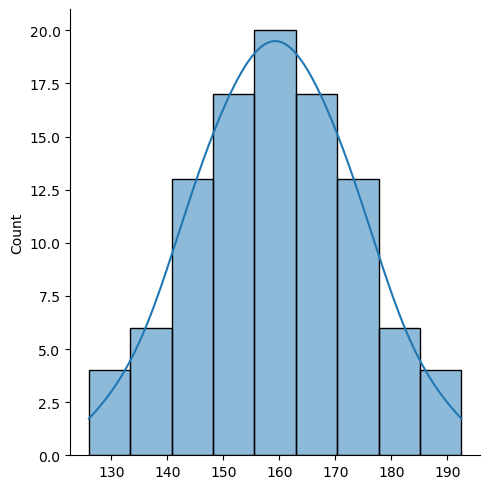

In [12]:
sns.displot(height_data, kde=True)

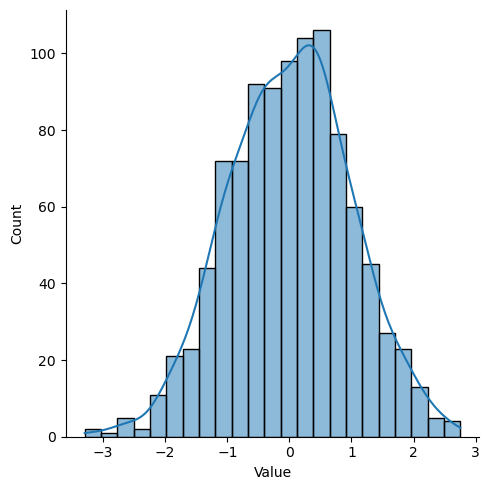

In [13]:
normal_data = skewnorm.rvs(a=0, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(normal_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [14]:
np.mean(normal_data), np.median(normal_data), stats.mode(normal_data), np.var(
    normal_data
), np.std(normal_data)

(0.010350238655901092,
 0.046085888724417746,
 ModeResult(mode=-3.296746459688028, count=1),
 0.9702041135391227,
 0.9849893976785348)

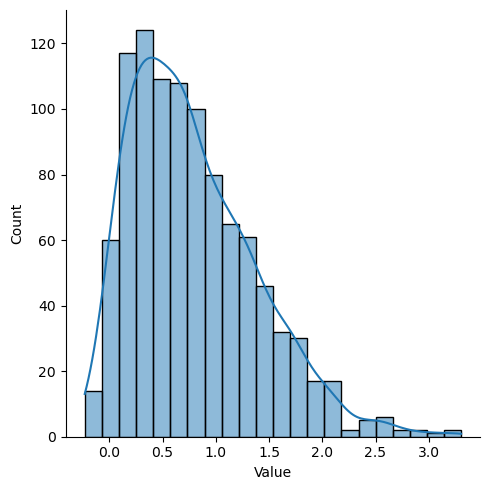

In [15]:
positive_data = skewnorm.rvs(a=10, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(positive_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [16]:
np.mean(positive_data), np.median(positive_data), stats.mode(positive_data), np.var(
    positive_data
), np.std(positive_data)

(0.7879305722863723,
 0.6802986066664292,
 ModeResult(mode=-0.23039407957790403, count=1),
 0.34887736809232,
 0.5906584191326828)

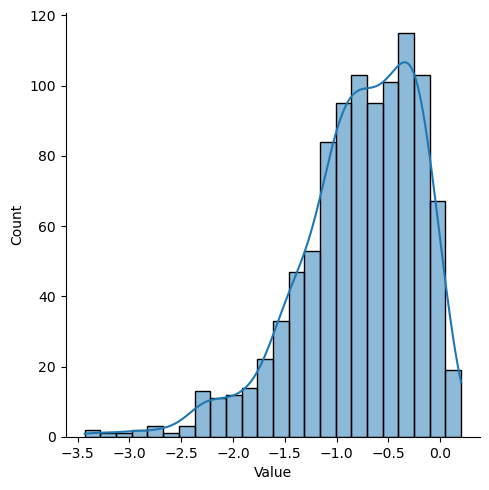

In [17]:
negative_data = skewnorm.rvs(a=-10, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(negative_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [18]:
np.mean(negative_data), np.median(negative_data), stats.mode(negative_data), np.var(
    negative_data
), np.std(negative_data)

(-0.7816960648282332,
 -0.7053813964339186,
 ModeResult(mode=-3.4323186976065054, count=1),
 0.33934584363810294,
 0.582533984964056)

#### Standardized normal distribution

In [19]:
standart_normal_data = np.random.normal(loc=0, scale=1, size=1000)

min(standart_normal_data), max(standart_normal_data)

(-2.7022713460450203, 2.910477511702584)

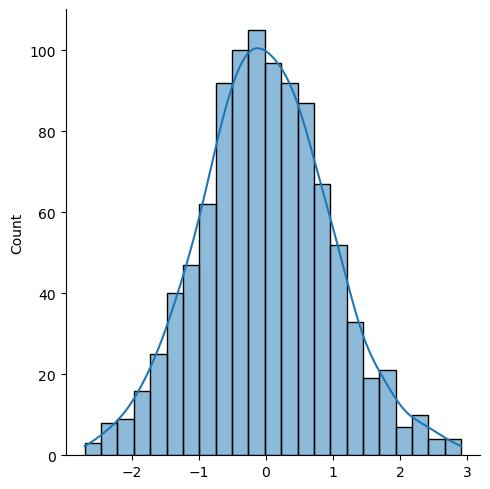

In [20]:
sns.displot(standart_normal_data, kde=True)

In [21]:
standart_normal_data.mean(), np.std(standart_normal_data),

(-0.00929516125749656, 0.960130189083689)

In [22]:
mean_height = height_data.mean()

mean_height

159.25

In [23]:
std_height = height_data.std()

std_height

13.65

In [24]:
standart_height_data = (height_data - mean_height) / std_height

standart_height_data

array([-2.43589744, -2.17948718, -1.92307692, -1.92307692, -1.66666667,
       -1.66666667, -1.41025641, -1.41025641, -1.41025641, -1.41025641,
       -1.15384615, -1.15384615, -1.15384615, -1.15384615, -1.15384615,
       -1.15384615, -0.8974359 , -0.8974359 , -0.8974359 , -0.8974359 ,
       -0.8974359 , -0.8974359 , -0.8974359 , -0.64102564, -0.64102564,
       -0.64102564, -0.64102564, -0.64102564, -0.64102564, -0.64102564,
       -0.64102564, -0.38461538, -0.38461538, -0.38461538, -0.38461538,
       -0.38461538, -0.38461538, -0.38461538, -0.38461538, -0.38461538,
       -0.12820513, -0.12820513, -0.12820513, -0.12820513, -0.12820513,
       -0.12820513, -0.12820513, -0.12820513, -0.12820513, -0.12820513,
        0.12820513,  0.12820513,  0.12820513,  0.12820513,  0.12820513,
        0.12820513,  0.12820513,  0.12820513,  0.12820513,  0.12820513,
        0.38461538,  0.38461538,  0.38461538,  0.38461538,  0.38461538,
        0.38461538,  0.38461538,  0.38461538,  0.38461538,  0.64

In [25]:
standart_height_data.mean(), standart_height_data.std()

(0.0, 0.9999999999999999)

#### Central limit theorem

In [26]:
heights = np.random.randint(126, 192, 500)

heights.mean()

158.454

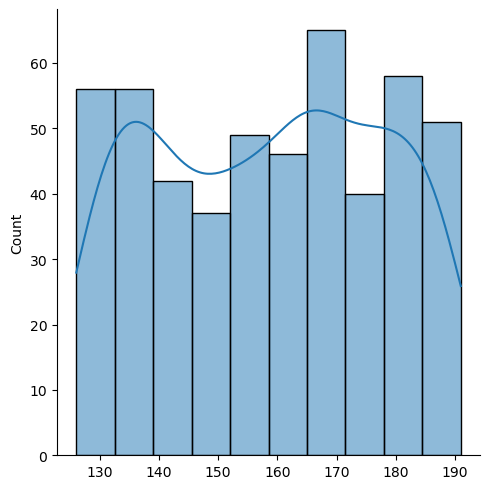

In [27]:
sns.displot(heights, kde=True)

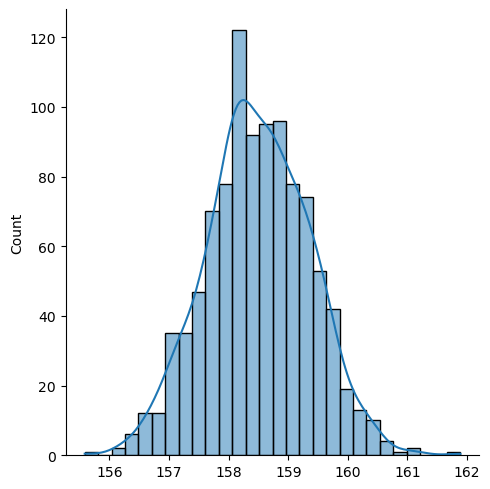

In [28]:
mean_height = np.array([np.random.randint(126, 192, 500).mean() for _ in range(1000)])

sns.displot(mean_height, kde=True)

#### Gamma distribution

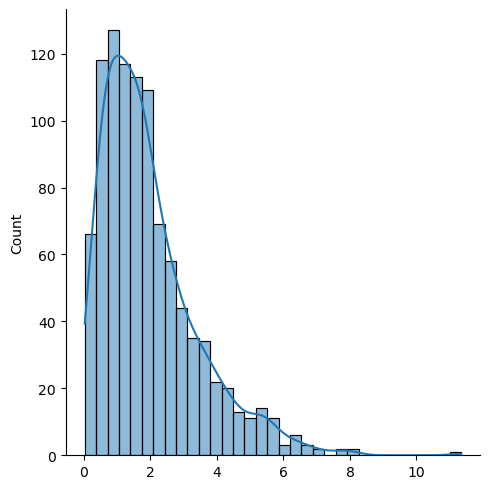

In [29]:
gamma_data = np.array(gamma.rvs(a=2, loc=0, scale=1, size=1000))

sns.displot(gamma_data, kde=True)

In [30]:
min(gamma_data), max(gamma_data)

(0.021843077856370872, 11.34496822490335)

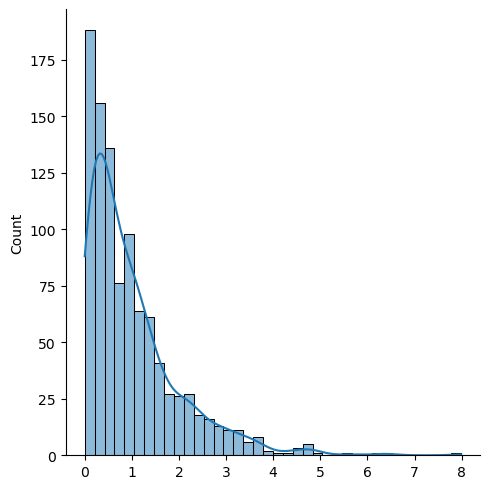

In [31]:
expon_data = np.array(expon.rvs(loc=0, scale=1, size=1000))

sns.displot(expon_data, kde=True)

In [32]:
min(expon_data), max(expon_data)

(0.00036861897167288064, 7.98876154500048)

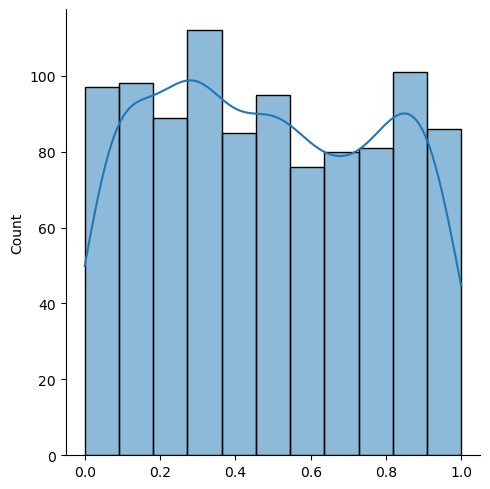

In [33]:
uniform_data = np.array(uniform.rvs(loc=0, scale=1, size=1000))

sns.displot(uniform_data, kde=True)

In [34]:
min(uniform_data), max(uniform_data)

(6.0890437886262916e-05, 0.9992264569994816)

In [35]:
credit_data = pd.read_csv("data/credit_data.csv")

credit_data.dropna(inplace=True)

credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [36]:
X = credit_data[["income", "age", "loan"]]
y = credit_data["c#default"]

In [37]:
results_naive_bayes = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )

    naive_bayes = GaussianNB()

    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)

    results_naive_bayes.append(accuracy_score(y_test, y_pred))


print(results_naive_bayes)

[0.9225, 0.9375, 0.915, 0.9275, 0.94, 0.9125, 0.945, 0.9325, 0.9225, 0.895, 0.9225, 0.93, 0.925, 0.9275, 0.915, 0.92, 0.92, 0.94, 0.925, 0.9325, 0.9, 0.935, 0.9225, 0.925, 0.915, 0.9225, 0.92, 0.9325, 0.9275, 0.93]


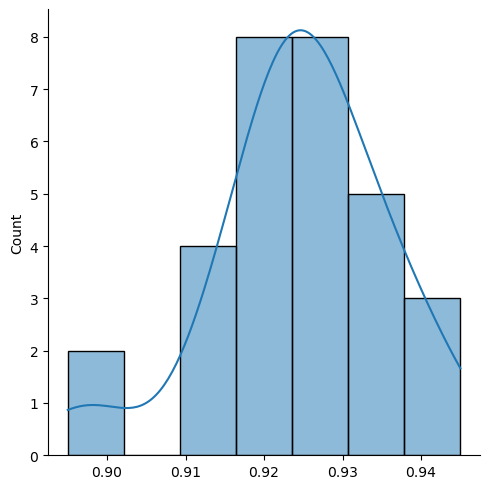

In [38]:
sns.displot(results_naive_bayes, kde=True)

In [39]:
data_bernoulli = np.array(bernoulli.rvs(size=1000, p=0.6))

np.unique(data_bernoulli, return_counts=True)

(array([0, 1]), array([409, 591]))

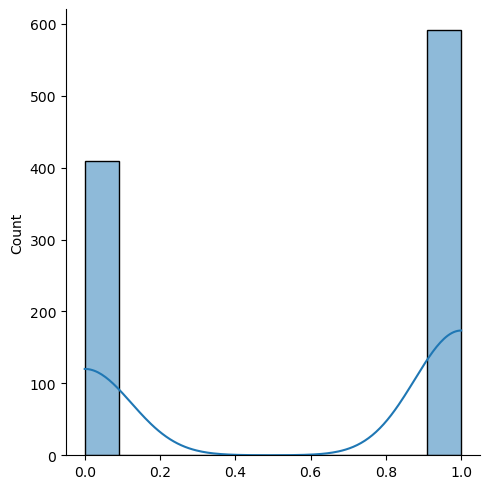

In [40]:
sns.displot(data_bernoulli, kde=True)

In [41]:
data_binom = np.array(binom.rvs(n=10, p=0.7, size=1000))

np.unique(data_binom, return_counts=True)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  6,   9,  40, 106, 191, 267, 256, 100,  25]))

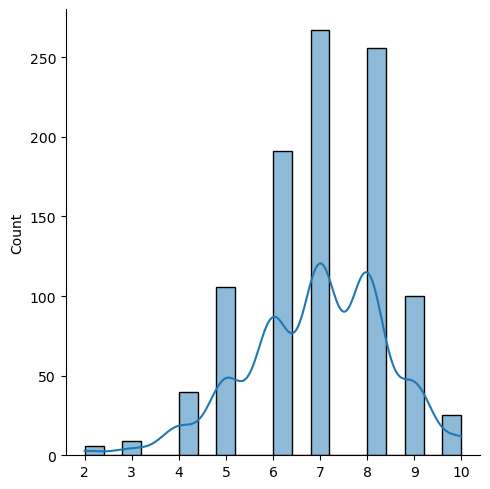

In [42]:
sns.displot(data_binom, kde=True)

In [43]:
data_poisson = np.array(poisson.rvs(mu=1, size=1000))

min(data_poisson), max(data_poisson)

(0, 6)

In [44]:
np.unique(data_poisson, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([383, 349, 182,  68,  14,   3,   1]))

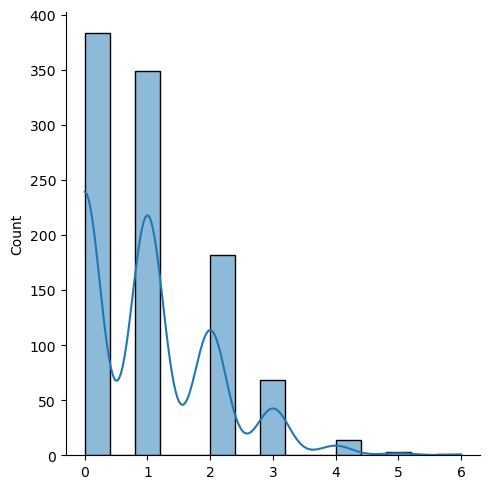

In [45]:
sns.displot(data_poisson, kde=True)

#### Exercise

In [46]:
census_data = pd.read_csv("data/census.csv")

census_data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


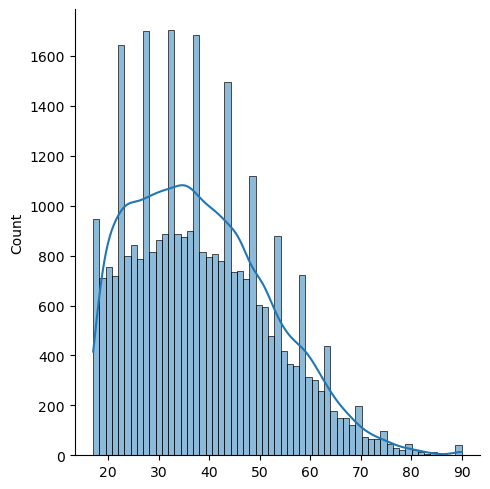

In [47]:
census_age = np.array(census_data["age"])

sns.displot(census_age, kde=True)

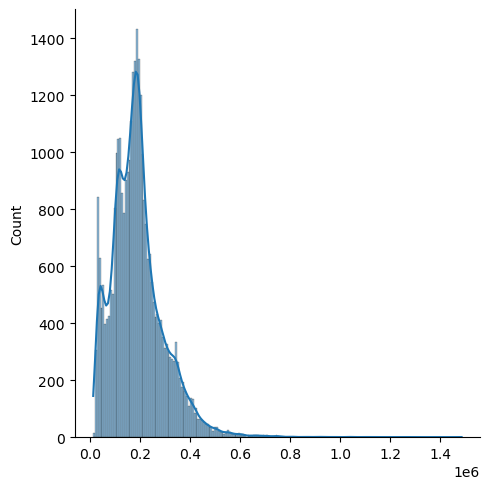

In [48]:
census_final_weight = np.array(census_data["final-weight"])

sns.displot(census_final_weight, kde=True)

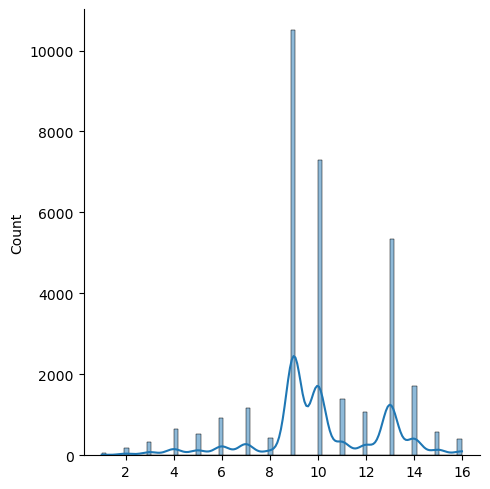

In [49]:
census_education_num = np.array(census_data["education-num"])

sns.displot(census_education_num, kde=True)

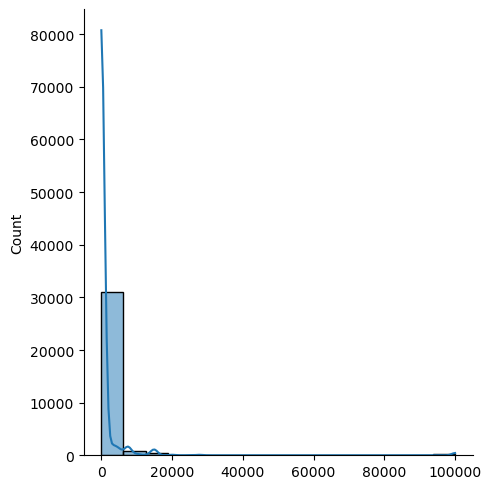

In [50]:
census_capital_gain = np.array(census_data["capital-gain"])

sns.displot(census_capital_gain, kde=True)

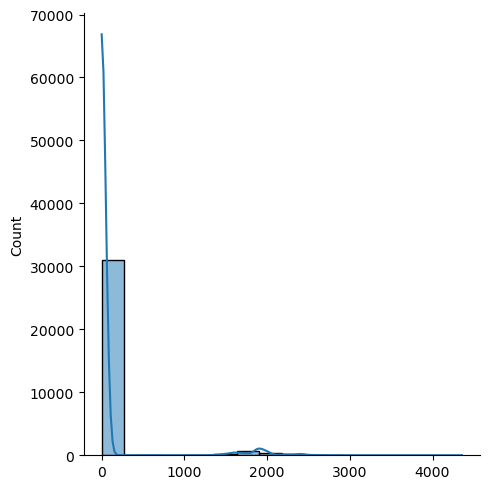

In [51]:
census_capital_loos = np.array(census_data["capital-loos"])

sns.displot(census_capital_loos, kde=True)

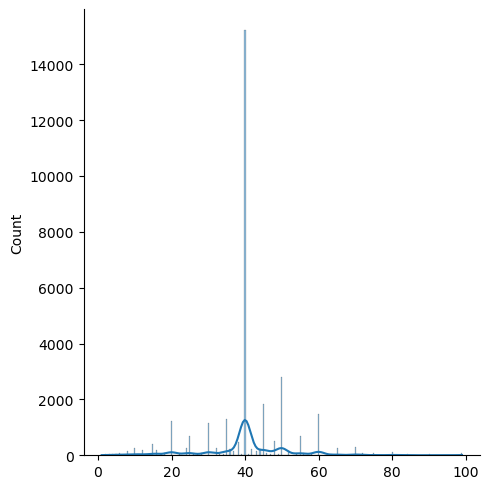

In [52]:
census_hour_per_week = np.array(census_data["hour-per-week"])

sns.displot(census_hour_per_week, kde=True)

<Axes: xlabel='count'>

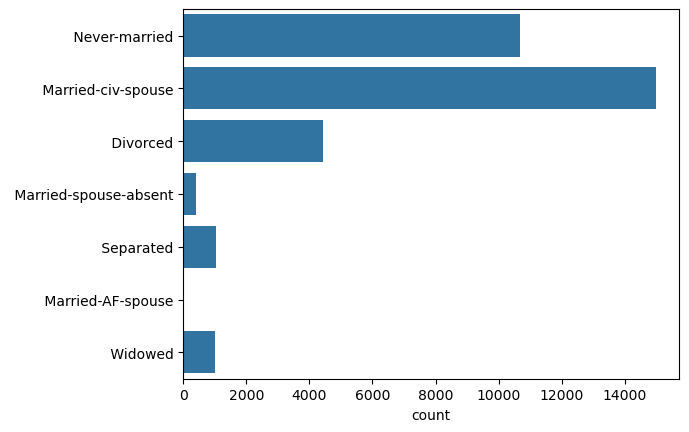

In [53]:
census_marital_status = np.array(census_data["marital-status"])

sns.countplot(census_marital_status)

<Axes: xlabel='count'>

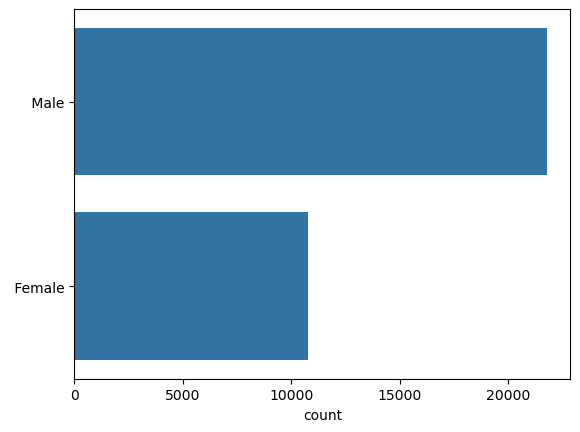

In [54]:
census_sex = np.array(census_data["sex"])

sns.countplot(census_sex)

<Axes: xlabel='count'>

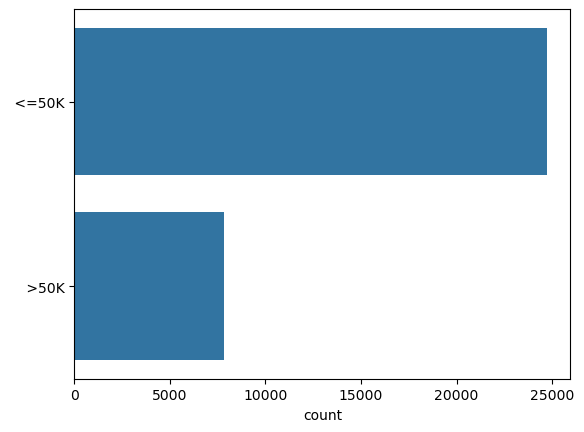

In [55]:
census_income = np.array(census_data["income"])

sns.countplot(census_income)

In [56]:
credit_data = pd.read_csv("data/credit_data.csv")

credit_data.dropna(inplace=True)

credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


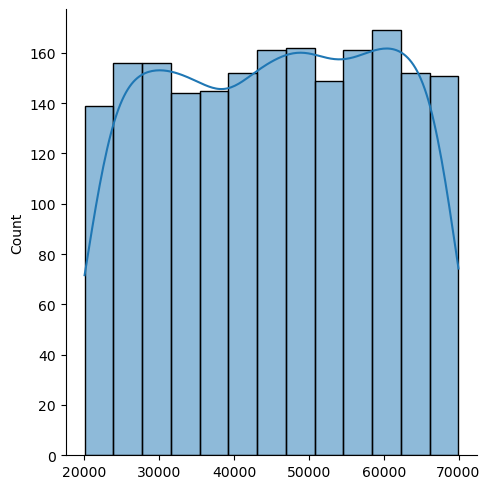

In [57]:
credit_income = np.array(credit_data["income"])

sns.displot(credit_income, kde=True)

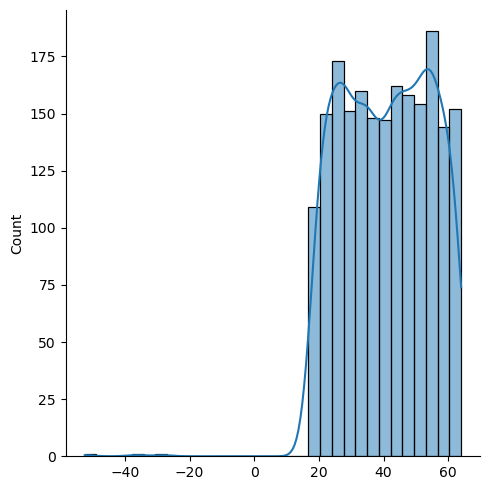

In [58]:
credit_age = np.array(credit_data["age"])

sns.displot(credit_age, kde=True)

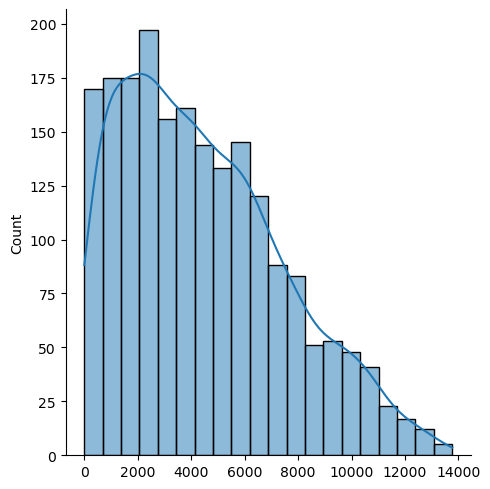

In [59]:
credit_load = np.array(credit_data["loan"])

sns.displot(credit_load, kde=True)

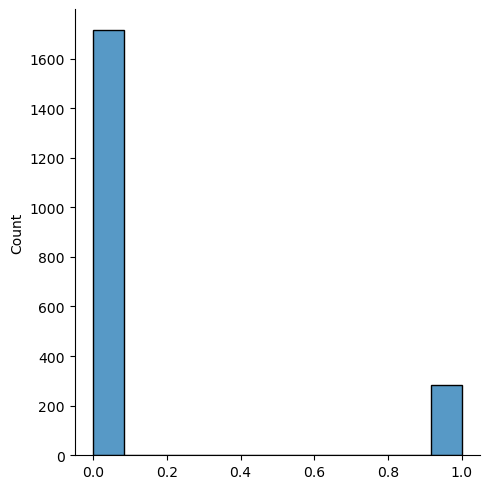

In [60]:
credit_c_defult = np.array(credit_data["c#default"])

sns.displot(credit_c_defult)

In [61]:
census_data = pd.read_csv("data/census.csv")

census_data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
census_data["sex"].unique()

array([' Male', ' Female'], dtype=object)

In [63]:
X = np.array(census_data["sex"].values)
y = np.array(census_data["income"].values)

label_encoder = LabelEncoder()

X = np.array(label_encoder.fit_transform(X))

X, np.unique(X)

(array([1, 1, 1, ..., 0, 1, 0]), array([0, 1]))

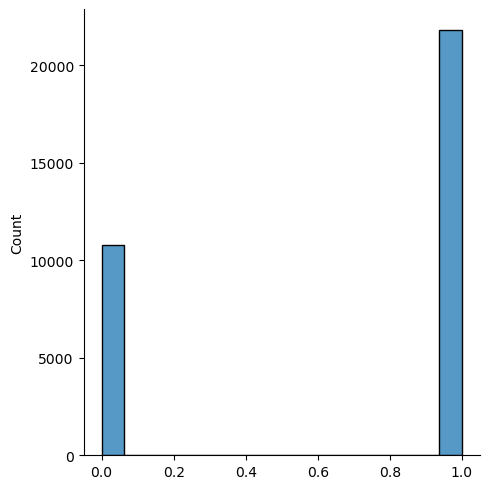

In [64]:
sns.displot(X, kde=False)

In [65]:
X.shape

(32561,)

In [66]:
X = X.reshape(-1, 1)

X.shape

(32561, 1)

#### Bernoulli

In [67]:
bernoulli_naive_bayes = BernoulliNB()

bernoulli_naive_bayes.fit(X, y)

BernoulliNB()

In [68]:
prediction = bernoulli_naive_bayes.predict(X)

prediction, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [69]:
accuracy_score(y, prediction)

0.7591904425539756

#### Multinomial

In [70]:
census_categorical_data = census_data.select_dtypes(include="object")

census_categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [71]:
X = census_categorical_data.drop(columns="income")
y = np.array(census_data["income"].values)

# Apply LabelEncoder column by column and convert back to DataFrame
X = X.apply(lambda col: pd.Series(LabelEncoder().fit_transform(col), index=col.index))

X.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,7,9,4,1,1,4,1,39
1,6,9,2,4,0,4,1,39
2,4,11,0,6,1,4,1,39
3,4,1,2,6,0,2,1,39
4,4,9,2,10,5,2,0,5


In [72]:
multinomial_naive_bayes = MultinomialNB()

multinomial_naive_bayes.fit(X, y)

MultinomialNB()

In [73]:
prediction = multinomial_naive_bayes.predict(X)

prediction, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [74]:
accuracy_score(y, prediction)

0.7450016891373115

#### Full Database

In [75]:
census_data = pd.read_csv("data/census.csv")

y = np.array(census_data["income"].values)

census_data.drop(columns="income", inplace=True)

for column in census_data.select_dtypes(include="object").columns:
    label_encoder = LabelEncoder()
    census_data[column] = label_encoder.fit_transform(census_data[column])

census_data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [76]:
X = census_data.values

X

array([[    39,      7,  77516, ...,      0,     40,     39],
       [    50,      6,  83311, ...,      0,     13,     39],
       [    38,      4, 215646, ...,      0,     40,     39],
       ...,
       [    58,      4, 151910, ...,      0,     40,     39],
       [    22,      4, 201490, ...,      0,     20,     39],
       [    52,      5, 287927, ...,      0,     40,     39]])

In [77]:
multinomial_naive_bayes = MultinomialNB()

multinomial_naive_bayes.fit(X, y)

prediction = multinomial_naive_bayes.predict(X)

prediction, y

(array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [78]:
accuracy_score(y, prediction)

0.7825619606277449

### Standardization (z-score) and KNN 

In [79]:
data_credit = pd.read_csv("data/credit_data.csv")

data_credit.dropna(inplace=True)

data_credit.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


##### No Standardization

In [80]:
X = data_credit.iloc[:, 1:4].values

y = np.array(data_credit.iloc[:, 4].values)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

In [81]:
np.mean(X_train[0]), np.median(X_train[0]), np.std(X_train[0])

(18018.215789099104, 5071.3718912882205, 21956.10795534022)

In [82]:
np.mean(X_test[0]), np.median(X_test[0]), np.std(X_test[0])

(10353.938187507958, 3827.8939146126, 12015.896328466857)

In [83]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [84]:
knn_classifier.predict(X_test)

knn_classifier.score(X_test, y_test)

0.8275

#### Standardization

In [85]:
z_score_train = StandardScaler()
z_score_test = StandardScaler()

In [86]:
X_train_p = z_score_train.fit_transform(X_train)
X_test_p = z_score_test.fit_transform(X_test)

X_train_p, X_test_p

(array([[ 0.24160393,  0.66932301,  0.1991047 ],
        [ 1.28038753, -1.07298039, -1.41483989],
        [ 1.05958983, -0.01333617,  0.17799087],
        ...,
        [ 0.57991495,  0.29122482, -0.39853551],
        [ 0.58083788,  0.64347218,  0.26502071],
        [-1.34229385,  0.52332837, -0.06783624]]),
 array([[-1.2707502 , -0.81710192, -0.18233446],
        [-0.90493376, -0.07654168, -1.36375723],
        [-0.1301719 ,  0.27274062, -1.19416917],
        ...,
        [-1.12153095, -1.56913294, -0.69340356],
        [ 1.32303834, -1.23713677,  2.30338336],
        [-1.68451003,  0.87710668, -0.88405137]]))

In [87]:
min(X_train_p[0]), max(X_train_p[0])

(0.19910470116445522, 0.6693230083481982)

In [88]:
np.mean(X_train_p[0]), np.median(X_train_p[0]), np.std(X_train_p[0])

(0.3700105474098557, 0.24160393271691344, 0.2123558462037444)

In [89]:
np.mean(X_test_p[0]), np.median(X_test_p[0]), np.std(X_test_p[0])

(-0.7567288597500532, -0.8171019217654755, 0.4463898810904571)

In [90]:
np.mean(X_train_p), np.median(X_train_p), np.std(X_train_p)

(3.040310182233783e-16, -0.03577925982564789, 1.0000000000000002)

In [91]:
np.mean(X_test_p), np.median(X_test_p), np.std(X_test_p)

(5.329070518200751e-17, -0.03615860408317491, 1.0000000000000002)

In [92]:
knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train_p, y_train)

KNeighborsClassifier()

In [93]:
prediction = knn_classifier.predict(X_test_p)

accuracy_score(y_test, prediction)

0.97

### Linear regression

#### Biased data and machine learning

In [94]:
house_prices_data = pd.read_csv("data/house_prices.csv")

house_prices_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


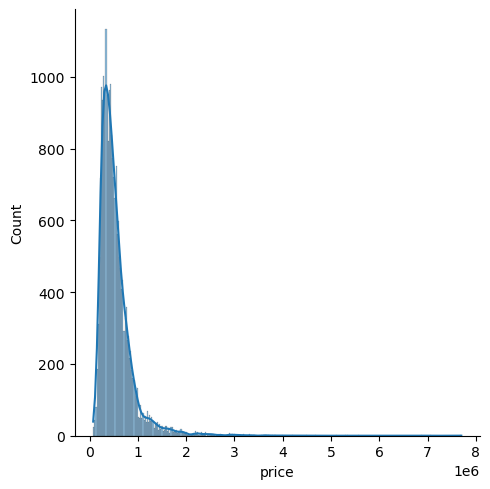

In [95]:
sns.displot(house_prices_data["price"], kde=True)

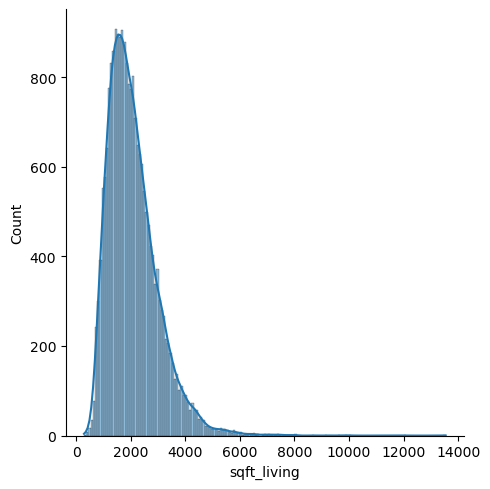

In [96]:
sns.displot(house_prices_data["sqft_living"], kde=True)

#### No treatment

In [97]:
X = np.array(house_prices_data["sqft_living"].values)
y = np.array(house_prices_data["price"].values)

X

array([1180, 2570,  770, ..., 1020, 1600, 1020])

In [98]:
X.shape

(21613,)

In [99]:
X = X.reshape(-1, 1)

X.shape

(21613, 1)

In [100]:
regression = LinearRegression()

regression.fit(X, y)

LinearRegression()

In [101]:
prediction = regression.predict(X)

prediction, y

(array([287555.06702452, 677621.82640197, 172499.40418656, ...,
        242655.29616092, 405416.96554144, 242655.29616092]),
 array([221900., 538000., 180000., ..., 402101., 400000., 325000.]))

In [102]:
mean_absolute_error(y, prediction), r2_score(y, prediction)

(173688.27335953107, 0.4928532179037931)

#### With Treatment

(<seaborn.axisgrid.FacetGrid at 0x7f2080e5ae40>,
 <seaborn.axisgrid.FacetGrid at 0x7f2098064ef0>)

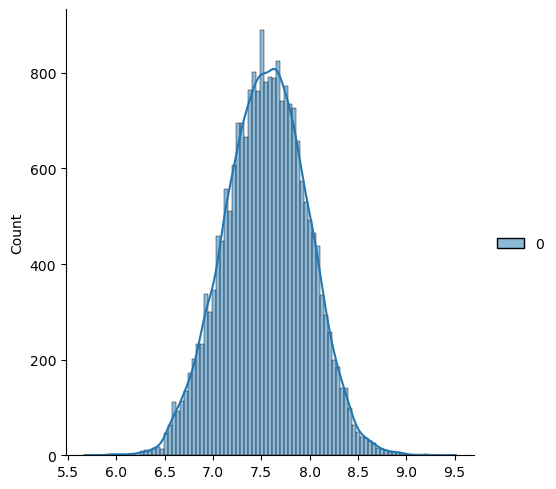

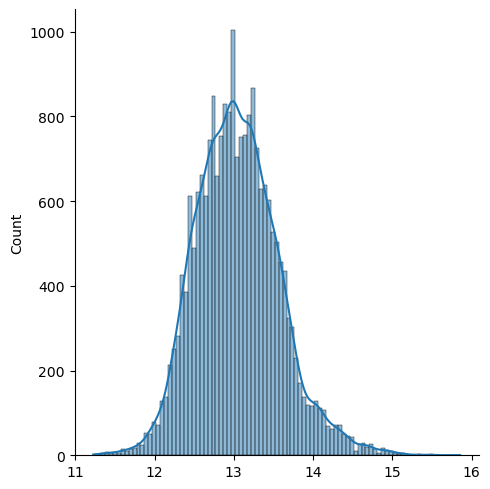

In [103]:
X_new = np.log(X)
y_new = np.log(y)

sns.displot(X_new, kde=True), sns.displot(y_new, kde=True)

In [104]:
regression = LinearRegression()

regression.fit(X_new, y_new)

prediction = regression.predict(X_new)

mean_absolute_error(y_new, prediction), r2_score(y_new, prediction)

(0.314671784942507, 0.45550706431577015)

### Neural Networks

In [107]:
normal = initializers.RandomNormal()

normal_data = normal(shape=[1000])

In [108]:
np.mean(normal_data), np.median(normal_data), np.std(normal_data)

(-0.0031850315, -0.004804181, 0.047407504)

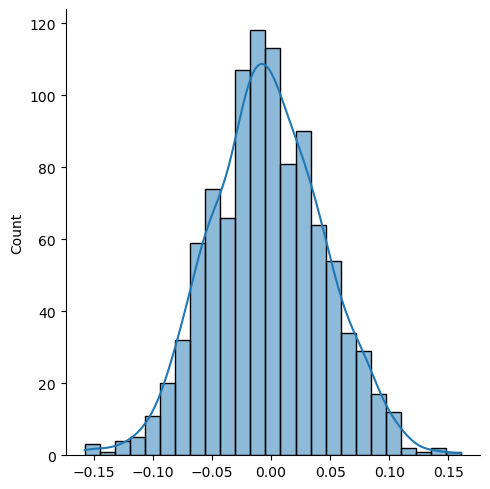

In [109]:
sns.displot(normal_data, kde=True)

In [110]:
uniform = initializers.RandomUniform()

uniform_data = uniform(shape=[1000])

np.mean(uniform_data), np.median(uniform_data), np.std(uniform_data)

(0.00012292892, 0.0016599428, 0.028604124)

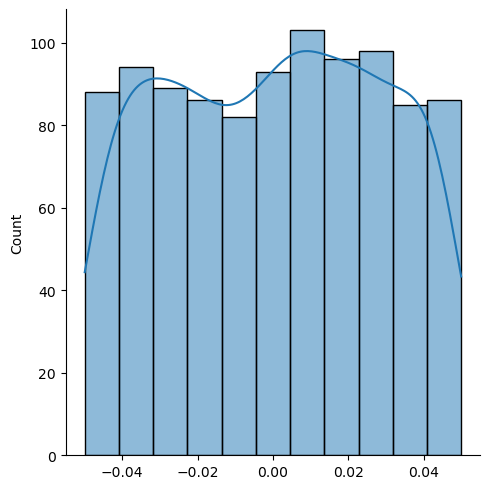

In [111]:
sns.displot(uniform_data, kde=True)

In [112]:
normal_glorot = initializers.GlorotNormal()

normal_data = normal_glorot(shape=[1000])

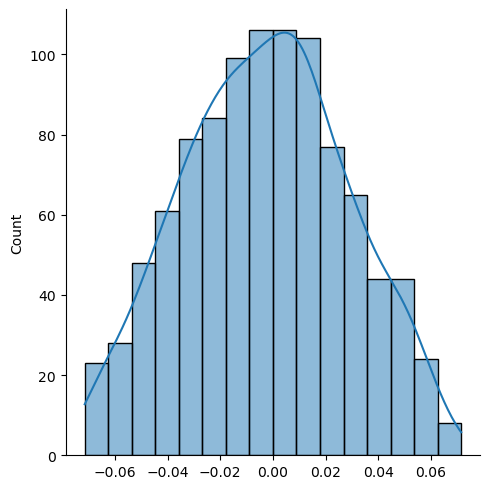

In [113]:
sns.displot(normal_data, kde=True)

In [114]:
uniform_glorot = initializers.GlorotUniform()

uniform_data = uniform_glorot(shape=[1000])

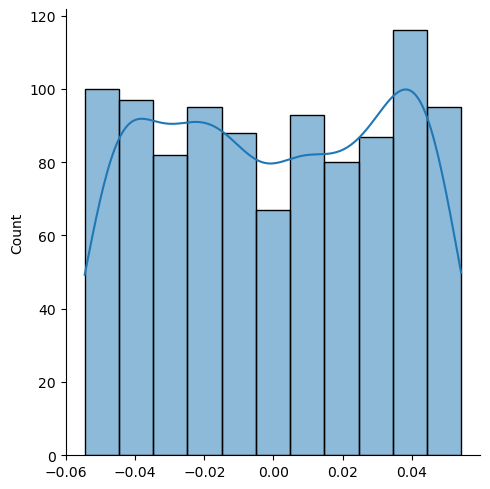

In [115]:
sns.displot(uniform_data, kde=True)

### Normality tests

In [118]:
normal_data = np.array(stats.norm.rvs(size=1000, loc=0, scale=1))

non_normal_data = np.array(stats.skewnorm.rvs(a=10, loc=0, scale=1, size=1000))

(<seaborn.axisgrid.FacetGrid at 0x7f1fe076cf50>,
 <seaborn.axisgrid.FacetGrid at 0x7f1fe0736c30>)

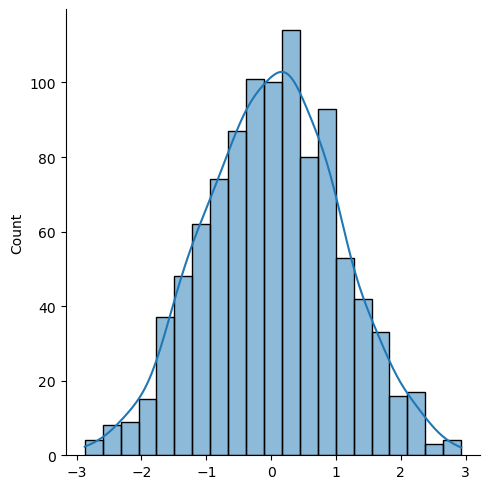

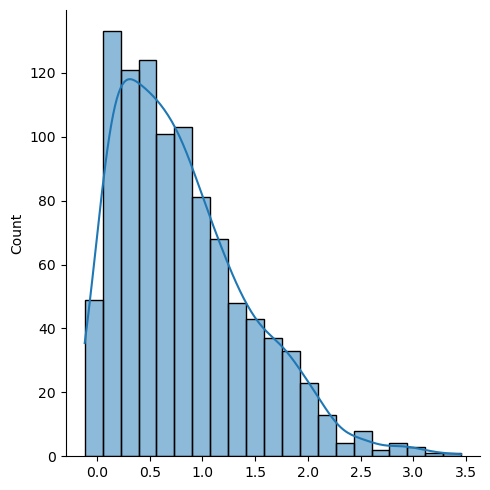

In [119]:
sns.displot(normal_data, kde=True), sns.displot(non_normal_data, kde=True)

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

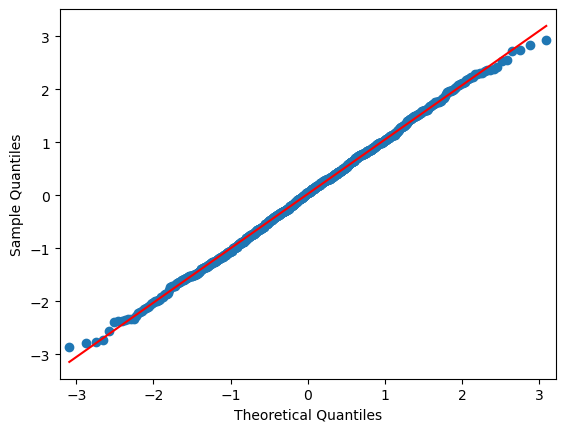

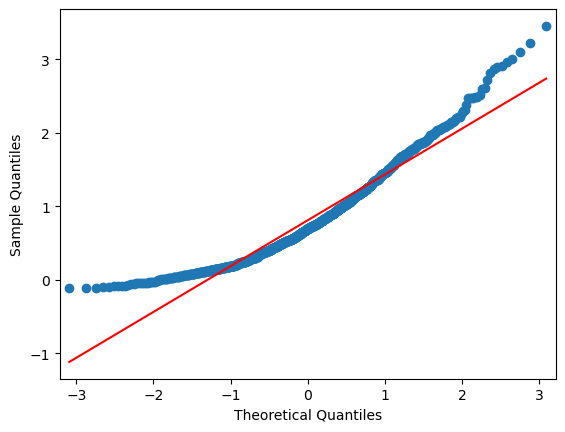

In [123]:
qqplot(normal_data, line="s"), qqplot(non_normal_data, line="s")

### Shapiro-Wilk

In [126]:
_, p = shapiro(normal_data)

p

0.48491056289898443

In [127]:
alpha = 0.05

if p > alpha:
    print("Normal")
else:
    print("Non-normal")

Normal


In [128]:
_, p = shapiro(non_normal_data)

p

1.2068435860902419e-20

In [129]:
alpha = 0.05

if p > alpha:
    print("Normal")
else:
    print("Non-normal")

Non-normal
